In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime, date
import pytz
import math

from dateutil.parser import parse
from dateutil.parser import ParserError

In [2]:
path ='/Users/roozbeh/Library/CloudStorage/GoogleDrive-rouzbeh.shirvani01@universitadipavia.it/My Drive/Pavia/SEST2024/data/Future.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,time,humidity,wind_speed,Gd(i),Avg_Temp
0,01/12/25 12:00,60.252394,4.956055,47.525467,8.52584
1,02/12/25 12:00,54.231943,3.631836,76.219380,9.13284
2,03/12/25 12:00,49.262840,3.353516,104.236015,9.36978
3,04/12/25 12:00,44.175020,2.867188,111.515070,10.05178
4,05/12/25 12:00,46.000304,2.578125,111.464294,10.83870
...,...,...,...,...,...
1795,26/11/30 12:00,48.143090,5.307617,57.700740,7.17996
1796,27/11/30 12:00,46.091680,4.643555,88.264336,5.67318
1797,28/11/30 12:00,49.383570,3.236328,51.440994,6.37510
1798,29/11/30 12:00,66.658105,4.572266,18.953333,10.05440


In [5]:
df['humidity'] = ((df['humidity'] - df['humidity'].min()) /
                       (df['humidity'].max() - df['humidity'].min())) * 100

In [6]:
date_column = 'time'

# Function to check if a date is valid
def is_valid_date(date_str):
    try:
        parse(date_str)
        return True
    except ParserError:
        return False

# Apply the function to filter out invalid dates
valid_dates_df = df[df[date_column].apply(is_valid_date)]


In [7]:
# If you want to replace your original DataFrame
df = valid_dates_df
df['time'] = pd.to_datetime(df['time'], format="%d/%m/%y %H:%M")

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gq/T/ipykernel_50885/896135439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'], format="%d/%m/%y %H:%M")


In [8]:
df

,time,humidity,wind_speed,Gd(i),Avg_Temp
0,2025-12-01 12:00:00,16.008460,4.956055,47.525467,8.52584
1,2025-12-02 12:00:00,13.400695,3.631836,76.219380,9.13284
2,2025-12-03 12:00:00,11.248322,3.353516,104.236015,9.36978
3,2025-12-04 12:00:00,9.044526,2.867188,111.515070,10.05178
4,2025-12-05 12:00:00,9.835150,2.578125,111.464294,10.83870
...,...,...,...,...,...
1795,2030-11-26 12:00:00,10.763301,5.307617,57.700740,7.17996
1796,2030-11-27 12:00:00,9.874730,4.643555,88.264336,5.67318
1797,2030-11-28 12:00:00,11.300616,3.236328,51.440994,6.37510
1798,2030-11-29 12:00:00,18.783102,4.572266,18.953333,10.05440


In [9]:
df= df.set_index('time')

In [10]:
# df = df.tz_convert('Europe/Rome')

In [11]:
# df.index = df.index.tz_convert('Europe/Rome').tz_localize(None)

In [12]:
# row_to_copy = df.loc['2005-01-01 01:00:00']
# row_to_duplicate_df = pd.DataFrame(row_to_copy).transpose()
# row_to_duplicate_df.index = pd.to_datetime(['2005-01-01 00:00:00'])
# df = pd.concat([row_to_duplicate_df, df]).sort_index()

In [13]:
# df['Avg_Temp'] = (df['temp_min']+df['temp_max'])/2

In [14]:
df_filtered = df.loc['2028-12-01 12:00:00':'2029-12-01 12:00:00']

In [15]:
# df_filtered = df_filtered.loc[:, ~df_filtered.columns.isin(['pressure', 'temp_min', 'temp_max', 'Gb(i)'])]

In [16]:
# df_filtered.describe()

In [17]:
# variable = 'Avg_Temp'

In [18]:
# daily_averages = df
# input_data = []
# output_label = []
# 
# # Loop over each day, aligning daily averages with the same day's hourly values
# for i in range(len(daily_averages)):
#     # Get daily average for the current day
#     daily_avg = daily_averages.iloc[i]
# 
#     hourly_values = df_filtered[variable][i*24:(i+1)*24]
# 
#     if len(hourly_values) == 24:
#         input_data.append(daily_avg.values)
#         output_label.append(hourly_values.values)

In [19]:
def calculate_sunrise_sunset(latitude, longitude, date):
    location = LocationInfo(latitude=latitude, longitude=longitude)
    timezone = pytz.timezone('Europe/Rome')
    s = sun(location.observer, date=date, tzinfo=timezone)
    sunrise = s['sunrise'].hour + s['sunrise'].minute/60
    sunset = s['sunset'].hour + s['sunset'].minute/60
    return sunrise, sunset


In [20]:
df = df_filtered

unique_dates = pd.Series(df.iloc[:,:].index.date).unique()
sunrise_times = []
sunset_times = []
dates = []

latitude = 40.5112  # Example latitude, adjust to your location
longitude = 16.3723  # Example longitude, adjust to your location

for current_date in unique_dates:
    sunrise, sunset = calculate_sunrise_sunset(latitude, longitude, current_date)
    dates.append(current_date)
    sunrise_times.append(int(sunrise))
    sunset_times.append(math.ceil(sunset))

# Create a DataFrame
sun_times_df = pd.DataFrame({
    'date': dates,
    'sunrise': sunrise_times,
    'sunset': sunset_times
})


In [21]:
sun_times_df

,date,sunrise,sunset
0,2028-12-01,6,17
1,2028-12-02,7,17
2,2028-12-03,7,17
3,2028-12-04,7,17
4,2028-12-05,7,17
...,...,...,...
354,2029-11-27,6,17
355,2029-11-28,6,17
356,2029-11-29,6,17
357,2029-11-30,6,17


In [22]:
df

,humidity,wind_speed,Gd(i),Avg_Temp
time,,,,
2028-12-01 12:00:00,8.160221,7.666016,95.285515,6.93057
2028-12-02 12:00:00,15.783946,7.385742,51.540627,10.95315
2028-12-03 12:00:00,22.722626,4.977539,3.440332,12.69235
2028-12-04 12:00:00,19.449581,2.968750,40.177773,11.16262
2028-12-05 12:00:00,18.063392,4.575195,26.592604,10.45663
...,...,...,...,...
2029-11-27 12:00:00,25.018623,3.268555,68.620575,13.80770
2029-11-28 12:00:00,25.734072,2.710938,66.867500,13.89883
2029-11-29 12:00:00,22.019473,3.067383,47.671776,12.08040


In [23]:
daily_averages = df
# Create a 'date' column in daily_averages for merging
daily_averages['date'] = daily_averages.index.date
# daily_averages['month'] = daily_averages.index.month
daily_averages['day of year'] = daily_averages.index.dayofyear
# daily_averages['day'] = daily_averages.index.day

# Convert 'date' in sun_times_df to the same format for accurate merging
sun_times_df['date'] = pd.to_datetime(sun_times_df['date']).dt.date

# Merge based on the 'date' column
daily_averages = daily_averages.merge(sun_times_df, on='date', how='left')

# Optionally, remove the 'date' column if no longer needed
daily_averages.drop('date', axis=1, inplace=True)


In [24]:
daily_averages

,humidity,wind_speed,Gd(i),Avg_Temp,day of year,sunrise,sunset
0,8.160221,7.666016,95.285515,6.93057,336,6,17
1,15.783946,7.385742,51.540627,10.95315,337,7,17
2,22.722626,4.977539,3.440332,12.69235,338,7,17
3,19.449581,2.968750,40.177773,11.16262,339,7,17
4,18.063392,4.575195,26.592604,10.45663,340,7,17
...,...,...,...,...,...,...,...
354,25.018623,3.268555,68.620575,13.80770,331,6,17
355,25.734072,2.710938,66.867500,13.89883,332,6,17
356,22.019473,3.067383,47.671776,12.08040,333,6,17
357,11.358644,5.204102,86.853410,6.29690,334,6,17


In [25]:
mask = daily_averages['day of year'] != 366
daily_averages = daily_averages[mask]
daily_averages.drop(columns='day of year', inplace=True)

In [26]:
daily_averages

,humidity,wind_speed,Gd(i),Avg_Temp,sunrise,sunset
0,8.160221,7.666016,95.285515,6.93057,6,17
1,15.783946,7.385742,51.540627,10.95315,7,17
2,22.722626,4.977539,3.440332,12.69235,7,17
3,19.449581,2.968750,40.177773,11.16262,7,17
4,18.063392,4.575195,26.592604,10.45663,7,17
...,...,...,...,...,...,...
354,25.018623,3.268555,68.620575,13.80770,6,17
355,25.734072,2.710938,66.867500,13.89883,6,17
356,22.019473,3.067383,47.671776,12.08040,6,17
357,11.358644,5.204102,86.853410,6.29690,6,17


In [27]:
input_scaled = np.array(daily_averages)

In [28]:
input_scaled

array([[ 8.16022099,  7.6660156 , 95.285515  ,  6.93057   ,  6.        ,
        17.        ],
       [15.78394608,  7.385742  , 51.540627  , 10.95315   ,  7.        ,
        17.        ],
       [22.72262564,  4.977539  ,  3.440332  , 12.69235   ,  7.        ,
        17.        ],
       ...,
       [22.01947309,  3.0673828 , 47.671776  , 12.0804    ,  6.        ,
        17.        ],
       [11.35864418,  5.2041016 , 86.85341   ,  6.2969    ,  6.        ,
        17.        ],
       [11.57301851,  2.5917969 , 38.686165  ,  8.5997    ,  6.        ,
        17.        ]])

# Temperature prediction

In [29]:
from tensorflow.keras.models import load_model

model_temp = load_model('AvgTemp2')

In [30]:
predictions_temp = model_temp.predict(input_scaled)

12/12 [==============================] - 0s 298us/step


In [31]:
temp_real = pd.DataFrame(daily_averages.iloc[:,3])

In [32]:
from scipy.stats import skew

daily_temp_pred = np.mean(predictions_temp, axis=1)

stats_predicted = {
    'mean': daily_temp_pred.mean(),
    'std': daily_temp_pred.std(),
    'skewness': skew(daily_temp_pred)
}

stats_real = {
    'mean': temp_real.mean(),
    'std': temp_real.std(),
    'skewness': skew(temp_real)
}

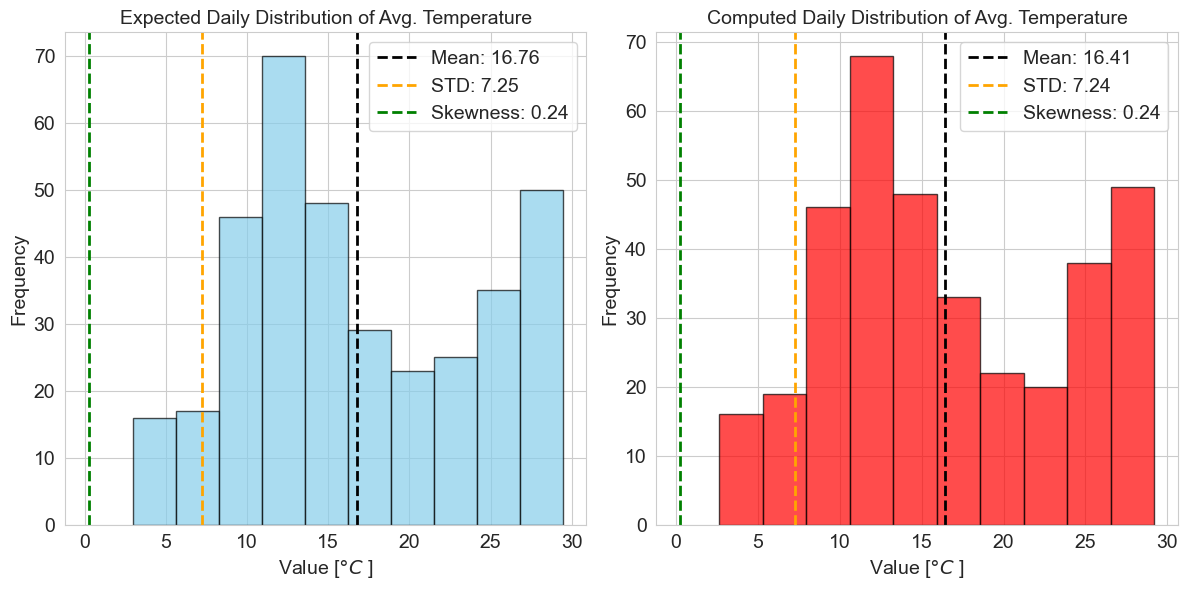

In [33]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Real Daily Means Plot
axes[0].hist(temp_real, color='skyblue', edgecolor='black', alpha=0.7, bins=10)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].axvline(stats_real['mean'][0], color='black', linestyle='dashed', linewidth=2, label=f"Mean: {stats_real['mean'][0]:.2f}")
axes[0].axvline(stats_real['std'][0], color='orange', linestyle='dashed', linewidth=2, label=f"STD: {stats_real['std'][0]:.2f}")
# axes[0].axvline(stats_real['mean'] + stats_real['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_real['mean'] + stats_real['std']:.2f}")
axes[0].axvline(stats_real['skewness'][0], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_real['skewness'][0]:.2f}")
axes[0].set_title('Expected Daily Distribution of Avg. Temperature',fontsize=14)
axes[0].set_xlabel('Value [$\degree C$ ]',fontsize=14)
axes[0].set_ylabel('Frequency',fontsize=14)
axes[0].legend(fontsize=14)
axes[0].grid(True)

# Predicted Daily Means Plot
axes[1].hist(daily_temp_pred, color='red', edgecolor='black', alpha=0.7, bins=10)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].axvline(stats_predicted['mean'], color='black', linestyle='dashed', linewidth=2, label=f"Mean: {stats_predicted['mean']:.2f}")
axes[1].axvline(stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"STD: {stats_predicted['std']:.2f}")
# axes[1].axvline(stats_predicted['mean'] + stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_predicted['mean'] + stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['skewness'], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_predicted['skewness']:.2f}")
axes[1].set_title('Computed Daily Distribution of Avg. Temperature',fontsize=14)
axes[1].set_xlabel('Value [$\degree C$ ]',fontsize=14)
axes[1].set_ylabel('Frequency',fontsize=14)
axes[1].legend(fontsize=14)
axes[1].grid(True)



plt.tight_layout()
plt.savefig("/Users/roozbeh/Downloads/temp_stat2028.pdf", format='pdf',bbox_inches="tight")
plt.show()


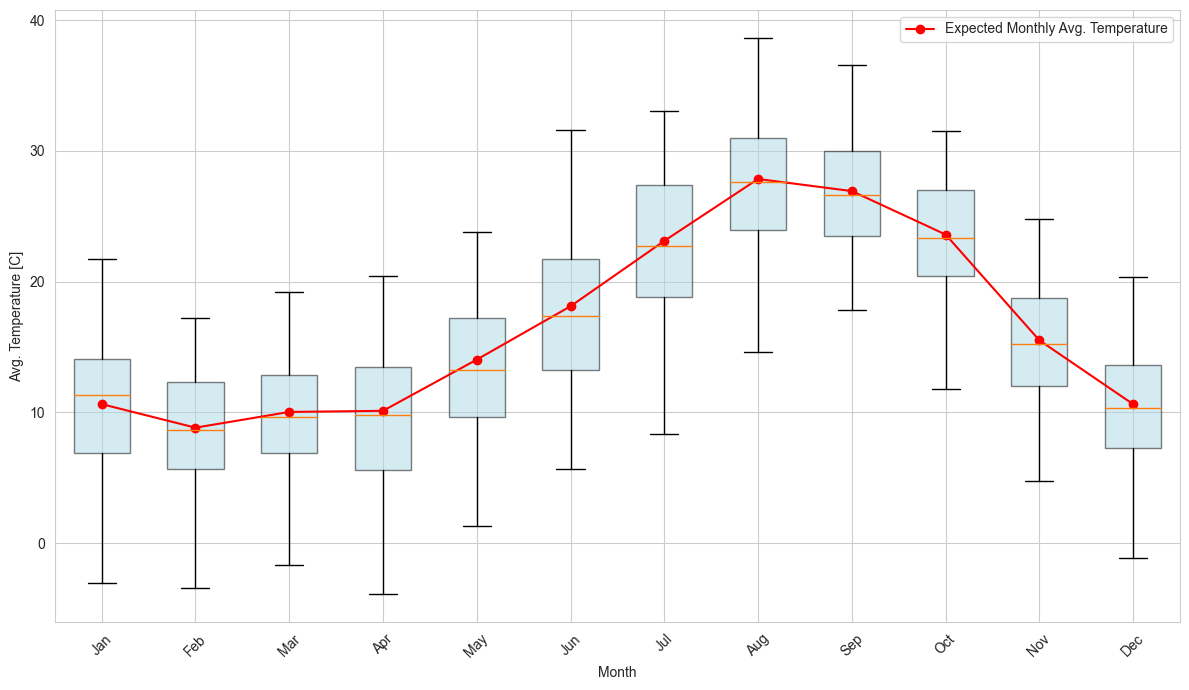

In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Assuming the starting date is January 1, 2020
start_date = '2028-01-01'
dates = pd.date_range(start_date, periods=len(temp_real), freq='D')

# Assigning the dates as the index
temp_real.index = dates
predictions_temp_df = pd.DataFrame(predictions_temp, index=dates)

# Aggregating hourly values for all days within each month into a list of arrays, one for each month
hourly_values_by_month = []
for _, group in predictions_temp_df.groupby(predictions_temp_df.index.month):
    monthly_values = group.values.flatten()  # Flattening to get a single long array of all hourly values in the month
    hourly_values_by_month.append(monthly_values)


monthly_average_temp_real = temp_real.resample('M').mean()

# Getting month names for the x-axis labels
month_names = [date.strftime('%b') for date in monthly_average_temp_real.index]

# Re-plotting with month names on the x-axis
fig, ax = plt.subplots(figsize=(12, 7))

# Box plots for hourly distributions per month
boxplots = ax.boxplot(hourly_values_by_month, patch_artist=True, positions=np.arange(len(hourly_values_by_month)), widths=0.6)

# Setting the x-axis labels to month names
ax.set_xticklabels(month_names, rotation=45)
ax.set_xlabel('Month')
ax.set_ylabel('Avg. Temperature [C]')

# Making the boxplot more transparent
for patch in boxplots['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.5)

# Adding the monthly average wind_real line plot on the same axis
lineplot = ax.plot(monthly_average_temp_real.index.month - 1, monthly_average_temp_real, color='red', label='Expected Monthly Avg. Temperature', marker='o', linestyle='-')

ax.legend( loc='upper right')

plt.tight_layout()
plt.show()




# Wind Speed

In [35]:
from tensorflow.keras.models import load_model

model = load_model('Wind2')

In [36]:
# a = pd.DataFrame(input_scaled)

In [37]:
# a.to_csv('Future.csv')

In [38]:
predictions_wind = model.predict(input_scaled)

12/12 [==============================] - 0s 415us/step


In [39]:
predictions_wind[predictions_wind<0]=0

In [40]:
wind_real = pd.DataFrame(daily_averages.iloc[:,1])

In [41]:
daily_wind_pred = np.mean(predictions_wind, axis=1)

In [42]:
from scipy.stats import skew

daily_wind_pred = np.mean(predictions_wind, axis=1)

stats_predicted = {
    'mean': daily_wind_pred.mean(),
    'std': daily_wind_pred.std(),
    'skewness': skew(daily_wind_pred)
}

stats_real = {
    'mean': wind_real.mean(),
    'std': wind_real.std(),
    'skewness': skew(wind_real)
}

In [43]:
stats_real

{'mean': wind_speed    3.339637
 dtype: float64,
 'std': wind_speed    2.036611
 dtype: float64,
 'skewness': array([1.00846247])}

In [44]:
predictions_wind.min()

0.0

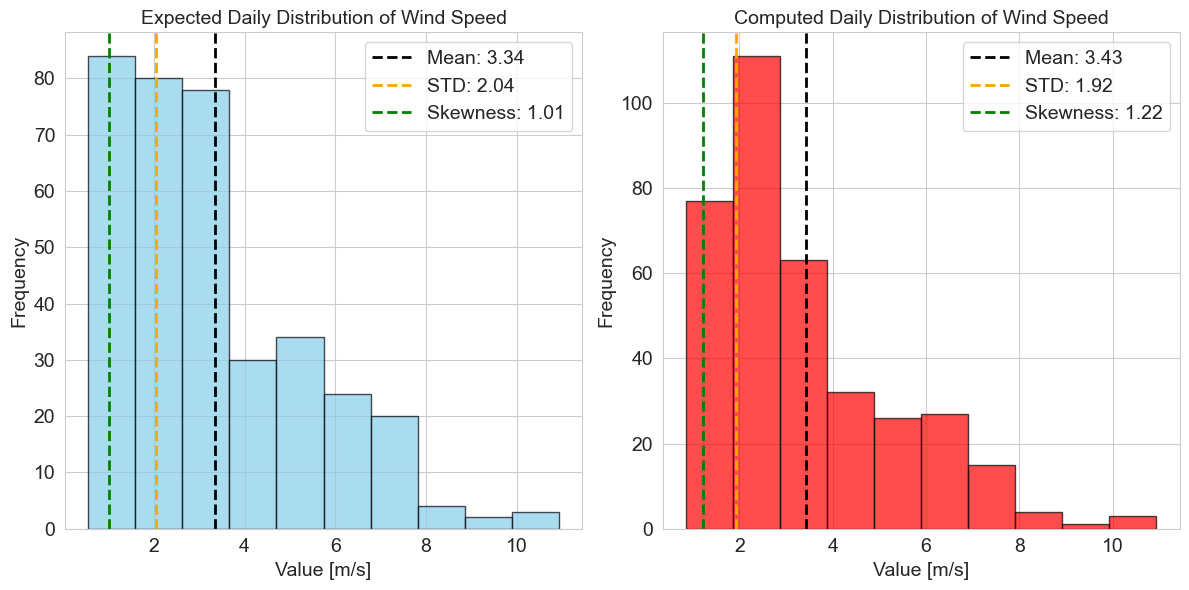

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Real Daily Means Plot
axes[0].hist(wind_real, color='skyblue', edgecolor='black', alpha=0.7, bins=10)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].axvline(stats_real['mean'][0], color='black', linestyle='dashed', linewidth=2, label=f"Mean: {stats_real['mean'][0]:.2f}")
axes[0].axvline(stats_real['std'][0], color='orange', linestyle='dashed', linewidth=2, label=f"STD: {stats_real['std'][0]:.2f}")
# axes[0].axvline(stats_real['mean'] + stats_real['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_real['mean'] + stats_real['std']:.2f}")
axes[0].axvline(stats_real['skewness'][0], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_real['skewness'][0]:.2f}")
axes[0].set_title('Expected Daily Distribution of Wind Speed',fontsize=14)
axes[0].set_xlabel('Value [m/s]',fontsize=14)
axes[0].set_ylabel('Frequency',fontsize=14)
axes[0].legend(fontsize=14)
axes[0].grid(True)

# Predicted Daily Means Plot
axes[1].hist(daily_wind_pred, color='red', edgecolor='black', alpha=0.7, bins=10)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].axvline(stats_predicted['mean'], color='black', linestyle='dashed', linewidth=2, label=f"Mean: {stats_predicted['mean']:.2f}")
axes[1].axvline(stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"STD: {stats_predicted['std']:.2f}")
# axes[1].axvline(stats_predicted['mean'] + stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_predicted['mean'] + stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['skewness'], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_predicted['skewness']:.2f}")
axes[1].set_title('Computed Daily Distribution of Wind Speed',fontsize=14)
axes[1].set_xlabel('Value [m/s]',fontsize=14)
axes[1].set_ylabel('Frequency',fontsize=14)
axes[1].legend(fontsize=14)
axes[1].grid(True)



plt.tight_layout()
plt.savefig("/Users/roozbeh/Downloads/wind_stat2028.pdf", format='pdf',bbox_inches="tight")
plt.show()


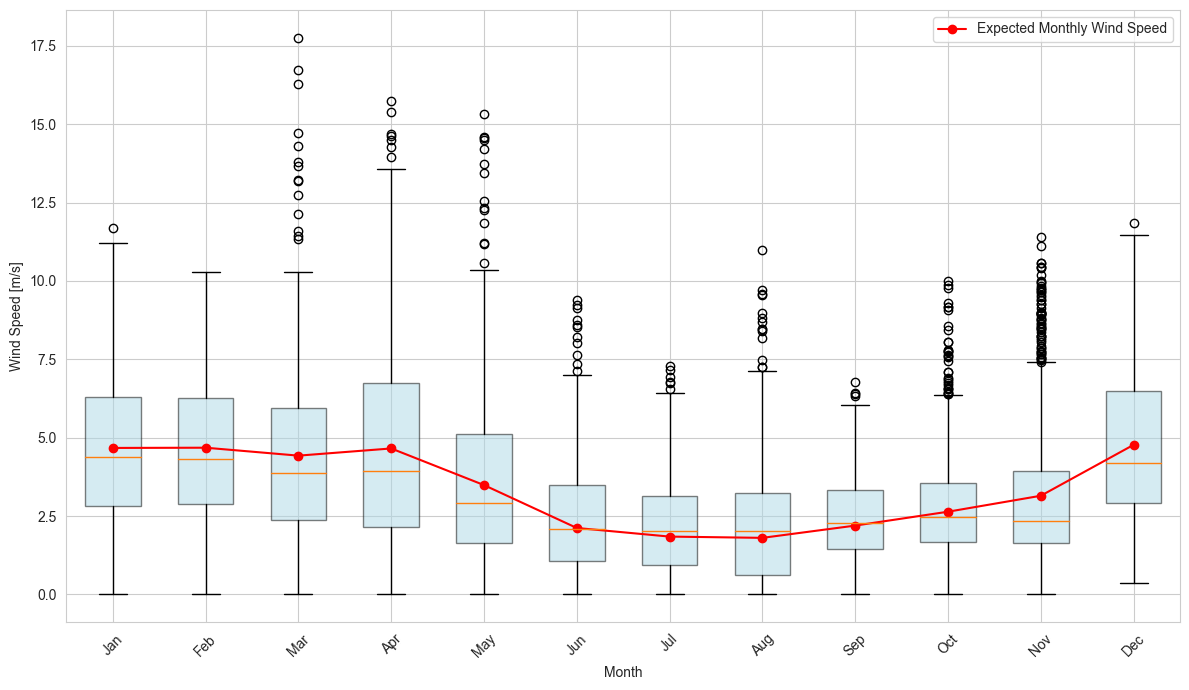

In [46]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Assuming the starting date is January 1, 2020
start_date = '2028-01-01'
dates = pd.date_range(start_date, periods=len(wind_real), freq='D')

# Assigning the dates as the index
wind_real.index = dates
predictions_wind_df = pd.DataFrame(predictions_wind, index=dates)

# Aggregating hourly values for all days within each month into a list of arrays, one for each month
hourly_values_by_month = []
for _, group in predictions_wind_df.groupby(predictions_wind_df.index.month):
    monthly_values = group.values.flatten()  # Flattening to get a single long array of all hourly values in the month
    hourly_values_by_month.append(monthly_values)


monthly_average_wind_real = wind_real.resample('M').mean()

# Getting month names for the x-axis labels
month_names = [date.strftime('%b') for date in monthly_average_wind_real.index]

# Re-plotting with month names on the x-axis
fig, ax = plt.subplots(figsize=(12, 7))

# Box plots for hourly distributions per month
boxplots = ax.boxplot(hourly_values_by_month, patch_artist=True, positions=np.arange(len(hourly_values_by_month)), widths=0.6)

# Setting the x-axis labels to month names
ax.set_xticklabels(month_names, rotation=45)
ax.set_xlabel('Month')
ax.set_ylabel('Wind Speed [m/s]')

# Making the boxplot more transparent
for patch in boxplots['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.5)

# Adding the monthly average wind_real line plot on the same axis
lineplot = ax.plot(monthly_average_wind_real.index.month - 1, monthly_average_wind_real, color='red', label='Expected Monthly Wind Speed', marker='o', linestyle='-')

ax.legend( loc='upper right')

plt.tight_layout()

plt.show()




# Gd

In [91]:
from tensorflow.keras.models import load_model

model_Gd = load_model('Gdi4')

In [92]:
predictions_sol = model_Gd.predict(input_scaled)

12/12 [==============================] - 0s 514us/step


In [93]:
sol_real = pd.DataFrame(daily_averages.iloc[:,2])

In [94]:
sol_real

,Gd(i)
0,95.285515
1,51.540627
2,3.440332
3,40.177773
4,26.592604
...,...
354,68.620575
355,66.867500
356,47.671776
357,86.853410


In [95]:


real_test = pd.DataFrame(sol_real).reset_index(drop=True)
predicted_test = pd.DataFrame(predictions_sol.reshape(-1))

data = pd.concat([predicted_test,real_test], axis=1)
data.columns = ['predicted', 'real']
daily_means = data.groupby(np.arange(len(data)) // 24).mean()
daily_means['predicted'].skew()
from scipy.stats import skew

In [96]:
predictions_sol = predicted_test.groupby(np.arange(len(predicted_test)) // 24).mean()
predictions_sol

,0
0,102.975044
1,56.702896
2,0.578209
3,44.351841
4,28.427134
...,...
354,71.144592
355,69.176773
356,51.412350
357,93.566673


In [97]:
sol_real

,Gd(i)
0,95.285515
1,51.540627
2,3.440332
3,40.177773
4,26.592604
...,...
354,68.620575
355,66.867500
356,47.671776
357,86.853410


In [98]:
from scipy.stats import skew

# daily_sol_pred = np.mean(predictions_sol, axis=1)

stats_predicted = {
    'mean': predictions_sol.mean()[0],
    'std': predictions_sol.std()[0],
    'skewness': skew(predictions_sol)[0]
}

stats_real = {
    'mean': sol_real.mean(),
    'std': sol_real.std(),
    'skewness': skew(sol_real)
}

In [99]:
stats_predicted['mean']

219.70038

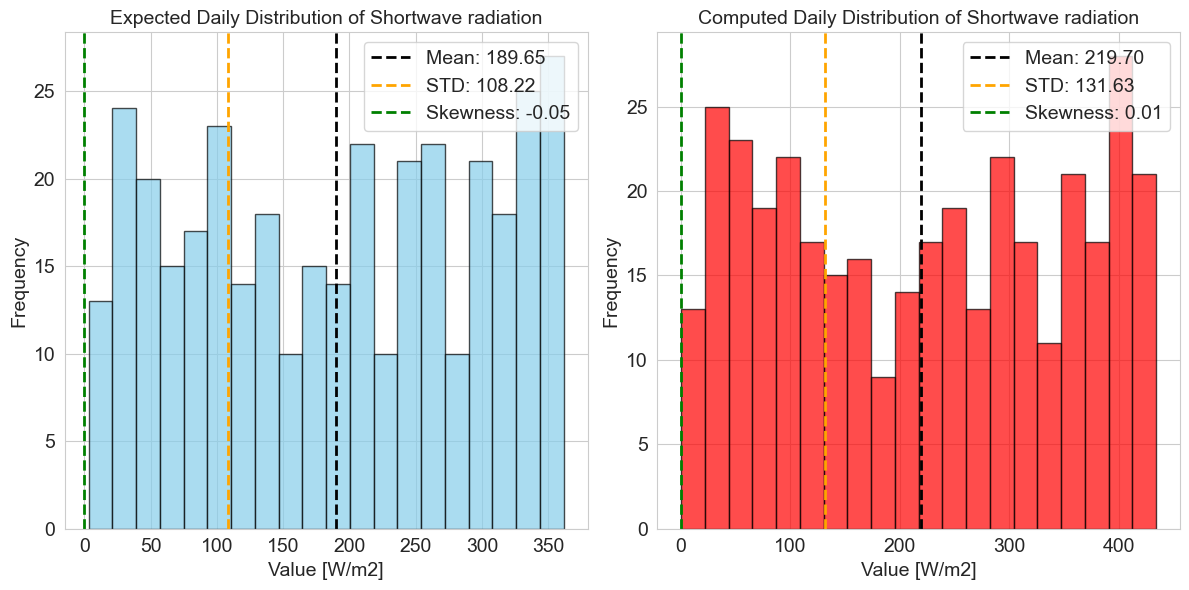

In [100]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Real Daily Means Plot
axes[0].hist(sol_real, color='skyblue', edgecolor='black', alpha=0.7, bins=20)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].axvline(stats_real['mean'][0], color='black', linestyle='dashed', linewidth=2, label=f"Mean: {stats_real['mean'][0]:.2f}")
axes[0].axvline(stats_real['std'][0], color='orange', linestyle='dashed', linewidth=2, label=f"STD: {stats_real['std'][0]:.2f}")
# axes[0].axvline(stats_real['mean'] + stats_real['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_real['mean'] + stats_real['std']:.2f}")
axes[0].axvline(stats_real['skewness'][0], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_real['skewness'][0]:.2f}")
axes[0].set_title('Expected Daily Distribution of Shortwave radiation',fontsize=14)
axes[0].set_xlabel('Value [W/m2]',fontsize=14)
axes[0].set_ylabel('Frequency',fontsize=14)
axes[0].legend(fontsize=14)
axes[0].grid(True)

# Predicted Daily Means Plot
axes[1].hist(predictions_sol, color='red', edgecolor='black', alpha=0.7, bins=20)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', labelsize=14)

axes[1].axvline(stats_predicted['mean'], color='black', linestyle='dashed', linewidth=2, label=f"Mean: {stats_predicted['mean']:.2f}")
axes[1].axvline(stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"STD: {stats_predicted['std']:.2f}")
# axes[1].axvline(stats_predicted['mean'] + stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_predicted['mean'] + stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['skewness'], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_predicted['skewness']:.2f}")
axes[1].set_title('Computed Daily Distribution of Shortwave radiation',fontsize=14)
axes[1].set_xlabel('Value [W/m2]',fontsize=14)
axes[1].set_ylabel('Frequency',fontsize=14)
axes[1].legend(fontsize=14)
axes[1].grid(True)



plt.tight_layout()

# plt.savefig("/Users/roozbeh/Downloads/rad_stat2028.pdf", format='pdf',bbox_inches="tight")
plt.show()


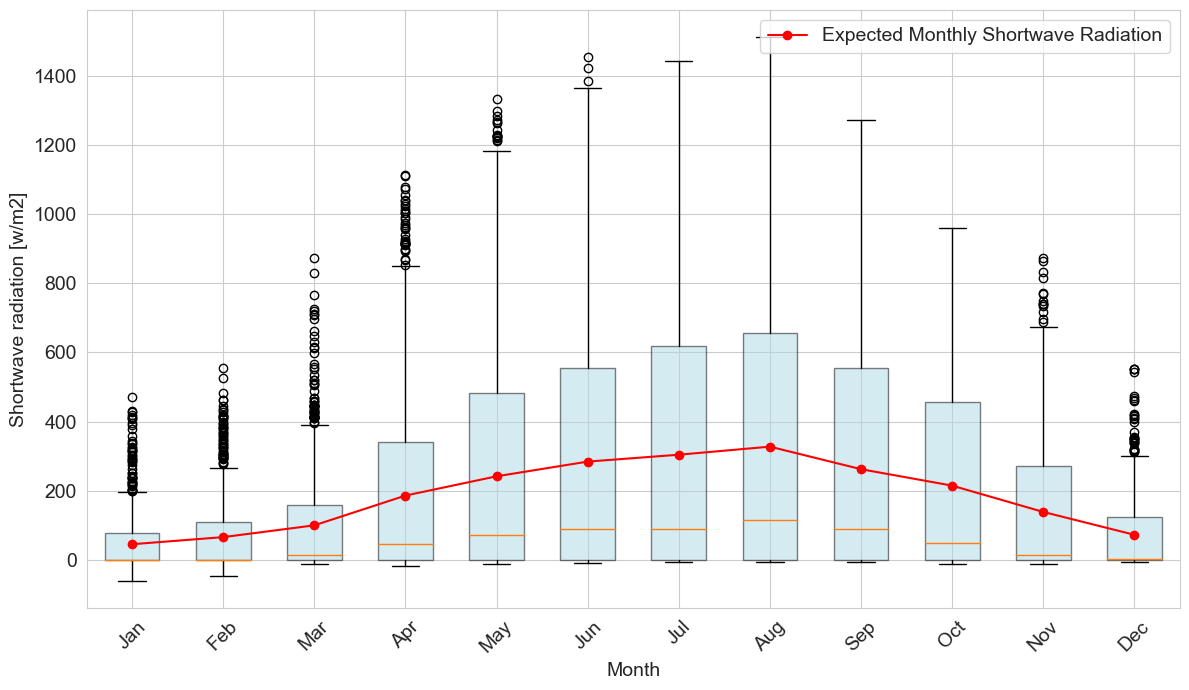

In [53]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Assuming the starting date is January 1, 2020
start_date = '2028-01-01'
dates = pd.date_range(start_date, periods=len(sol_real), freq='D')

# Assigning the dates as the index
sol_real.index = dates
predictions_sol_df = pd.DataFrame(predictions_sol, index=dates)

# Aggregating hourly values for all days within each month into a list of arrays, one for each month
hourly_values_by_month = []
for _, group in predictions_sol_df.groupby(predictions_sol_df.index.month):
    monthly_values = group.values.flatten()  # Flattening to get a single long array of all hourly values in the month
    hourly_values_by_month.append(monthly_values)


monthly_average_sol_real = sol_real.resample('M').mean()

# Getting month names for the x-axis labels
month_names = [date.strftime('%b') for date in monthly_average_sol_real.index]

# Re-plotting with month names on the x-axis
fig, ax = plt.subplots(figsize=(12, 7))
ax.tick_params(axis='y', labelsize=14)

# Box plots for hourly distributions per month
boxplots = ax.boxplot(hourly_values_by_month, patch_artist=True, positions=np.arange(len(hourly_values_by_month)), widths=0.6)

# Setting the x-axis labels to month names
ax.set_xticklabels(month_names, rotation=45,fontsize=14)
ax.set_xlabel('Month',fontsize=14 )
ax.set_ylabel('Shortwave radiation [w/m2]', fontsize=14)

# Making the boxplot more transparent
for patch in boxplots['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.5)

# Adding the monthly average wind_real line plot on the same axis
lineplot = ax.plot(monthly_average_sol_real.index.month - 1, monthly_average_sol_real, color='red', label='Expected Monthly Shortwave Radiation', marker='o', linestyle='-')

ax.legend( loc='upper right',fontsize=14)

plt.tight_layout()
# plt.savefig("/Users/roozbeh/Downloads/rad_dist2028.pdf", format='pdf',bbox_inches="tight")
plt.show()


